In [165]:
import pandas

data_path = "../data/"
filename = "combined_data.csv"

df = pandas.read_csv(data_path + filename)

df = df.drop("Unnamed: 0", axis=1)
df.head()

,date,state,fips,cases,deaths,EmergDec,GathRecomAny,GathRestrict10,GathRestrictAny,NEBusinessClose,...,GathRecomAnyStateWide,GathRestrict10StateWide,GathRestrictAnyStateWide,NEBusinessCloseStateWide,OtherBusinessCloseStateWide,PublicMaskStateWide,QuarantineStateWide,RestaurantRestrictStateWide,SchoolCloseStateWide,StayAtHomeStateWide
0,2020-01-21,Washington,53,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-22,Washington,53,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-23,Washington,53,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-24,Illinois,17,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-24,Washington,53,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
target = "cases" #"deaths", "cases"
not_features = ["date", "state"]
not_features.append(target)

target_values = df[target]
feature_values = df

for x in not_features:
    feature_values = feature_values.drop(x, axis=1)

feature_values.head()

,fips,deaths,EmergDec,GathRecomAny,GathRestrict10,GathRestrictAny,NEBusinessClose,OtherBusinessClose,PublicMask,Quarantine,...,GathRecomAnyStateWide,GathRestrict10StateWide,GathRestrictAnyStateWide,NEBusinessCloseStateWide,OtherBusinessCloseStateWide,PublicMaskStateWide,QuarantineStateWide,RestaurantRestrictStateWide,SchoolCloseStateWide,StayAtHomeStateWide
0,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sc = StandardScaler() #center mean at 0, variance to 1

x_train, x_test, y_train, y_test = train_test_split(feature_values, target_values, test_size=0.5, random_state=0)

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [168]:
'''
Recursive feature Elimination
Rank features in terms of accuracy in prediction power
'''
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

num_features = 1

model = LogisticRegression()
rfe = RFE(model, num_features)

fit = rfe.fit(x_train, y_train)

order = [list(x) for x in zip(fit.ranking_, feature_values.columns.values)]
order.sort()
order

[[1, 'StayAtHome'],
 [2, 'RestaurantRestrictMandate'],
 [3, 'GathRestrictAnyStateWide'],
 [4, 'NEBusinessCloseStateWide'],
 [5, 'StayAtHomeStateWide'],
 [6, 'StayAtHomeMandate'],
 [7, 'OtherBusinessCloseMandate'],
 [8, 'GathRestrict10StateWide'],
 [9, 'SchoolClose'],
 [10, 'PublicMaskStateWide'],
 [11, 'SchoolCloseMandate'],
 [12, 'Quarantine'],
 [13, 'GathRecomAnyStateWide'],
 [14, 'fips'],
 [15, 'EmergDecMandate'],
 [16, 'QuarantineMandate'],
 [17, 'GathRecomAny'],
 [18, 'RestaurantRestrictStateWide'],
 [19, 'SchoolCloseStateWide'],
 [20, 'PublicMaskMandate'],
 [21, 'GathRestrict10'],
 [22, 'OtherBusinessCloseStateWide'],
 [23, 'GathRestrictAny'],
 [24, 'NEBusinessClose'],
 [25, 'deaths'],
 [26, 'PublicMask'],
 [27, 'QuarantineStateWide'],
 [28, 'RestaurantRestrict'],
 [29, 'OtherBusinessClose'],
 [30, 'EmergDec'],
 [31, 'GathRecomAnyMandate'],
 [32, 'GathRestrict10Mandate'],
 [33, 'GathRestrictAnyMandate'],
 [34, 'NEBusinessCloseMandate'],
 [35, 'EmergDecStateWide']]

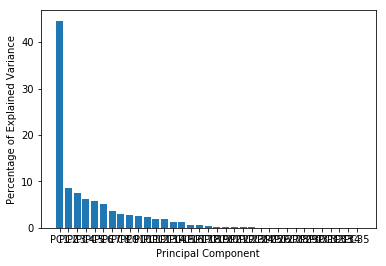

In [169]:
'''
Principal Components Analysis
Create and select new features with highest variance 
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

percent_variation = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ["PC" + str(x) for x in range(1, len(percent_variation)+1)]

#plot principal components with the largest explained variance 
plt.bar(x=range(1,len(percent_variation)+1), height=percent_variation, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.show()